In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

GENERATE_PNGS = False
pd.options.display.float_format = '{:.1f}'.format

## Training time analysis
**Notice**: Elapsed time is given in nanoseconds for TensorFlow and DCGAN in PyTorch. The rest of benchmarks is measured in milliseconds. All measurements are converted to seconds for the analysis as such precision will not be visible on graphs.

In [33]:
pytorch = pd.read_csv('../results/pytorch.csv')
pytorch = pytorch[pytorch.type == 'training']
pytorch.insert(0, 'framework', 'PyTorch')
# kinda counterintuitive, but where changes values where the condition is false
pytorch.elapsed_time.where(pytorch.model_name != 'DCGAN', pytorch.elapsed_time / 1000000000, inplace=True)
pytorch.elapsed_time.where(pytorch.model_name == 'DCGAN', pytorch.elapsed_time / 1000, inplace=True)
pytorch

tensorflow = pd.read_csv('../results/tensorflow.csv')
tensorflow = tensorflow[tensorflow.type == 'training']
tensorflow.insert(0, 'framework', 'TensorFlow')
tensorflow.elapsed_time /= 1000000000

libtorch = pd.read_csv('../results/libtorch.csv')
libtorch = libtorch[libtorch.type == 'training']
libtorch.insert(0, 'framework', 'LibTorch')
libtorch.elapsed_time /= 1000

training = pd.concat([pytorch, tensorflow, libtorch])
training.drop(columns=['type', 'loss', 'performance'], inplace=True)
training.reset_index(drop=True, inplace=True)

### LibTorch: native and imported models

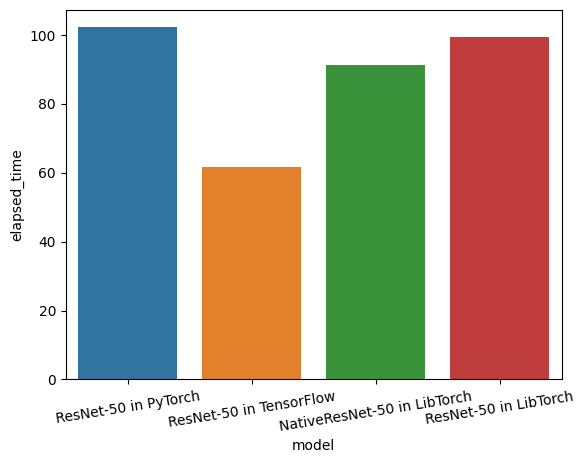

In [64]:
fig, ax = plt.subplots(1,1)

resnet = training[(training.model_name == 'ResNet-50') | (training.model_name == 'NativeResNet-50')]
resnet = resnet[resnet.epoch == 5].drop(columns=['epoch'])
resnet['model'] = resnet.pop('model_name') + ' in ' + resnet.pop('framework')
resnet
sns.barplot(data=resnet, x='model', y='elapsed_time', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=9)

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_native_vs_imported.png')

### Classification: LibTorch vs PyTorch
How do native and imported models in LibTorch comapre against PyTorch implementations?

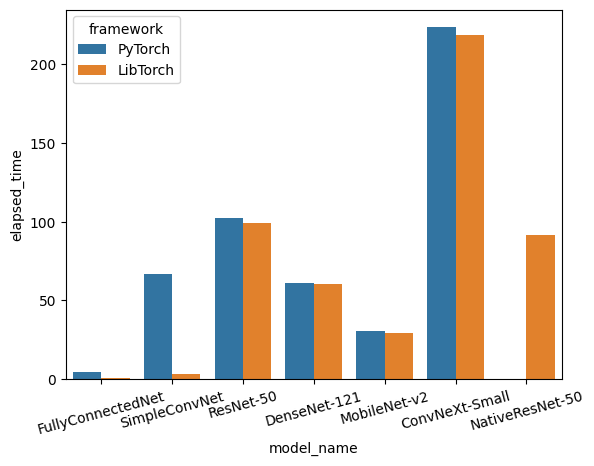

In [73]:
fig, ax = plt.subplots(1,1)

clfs = training[(training.framework == 'PyTorch') | (training.framework == 'LibTorch')]
clfs = clfs[clfs.epoch == 5].drop(columns=['epoch'])
clfs = clfs[clfs.model_name != 'DCGAN']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_vs_pytorch_clfs.png')

### DCGAN

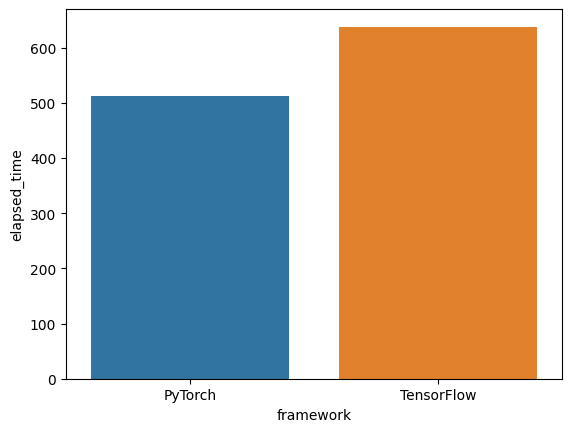

In [76]:
fig, ax = plt.subplots(1,1)

dcgan = training[training.model_name == 'DCGAN']
dcgan = dcgan[dcgan.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=dcgan, x='framework', y='elapsed_time', ax=ax)

if GENERATE_PNGS:
	fig.savefig('./plots/dcgan_comparison.png')

## Inference and generation time analysis
to do